<a href="https://colab.research.google.com/github/ZynTran/MyProject-s-D-ch-v-Logtech/blob/main/Grab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.7 MB/s eta 0:00:00


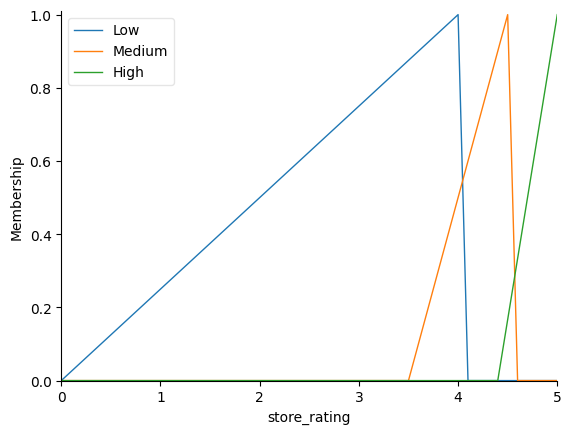

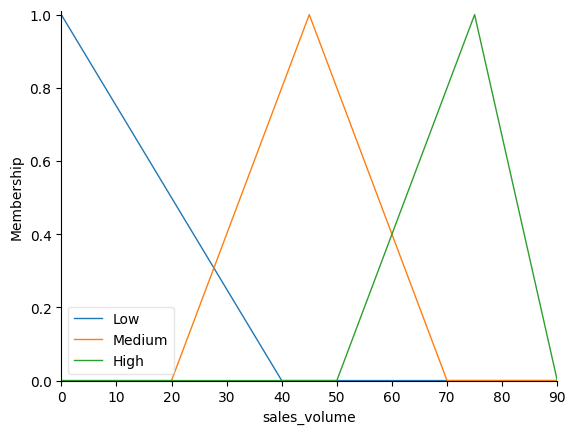

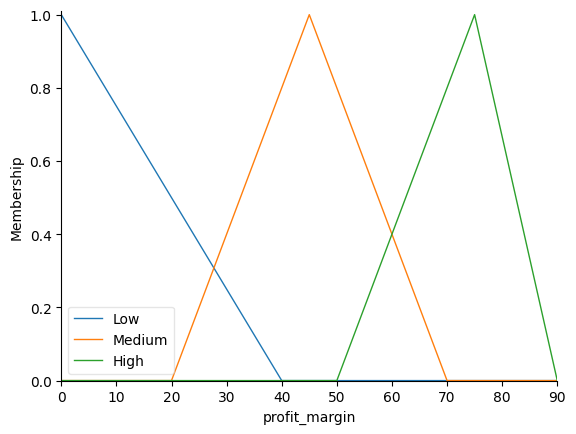

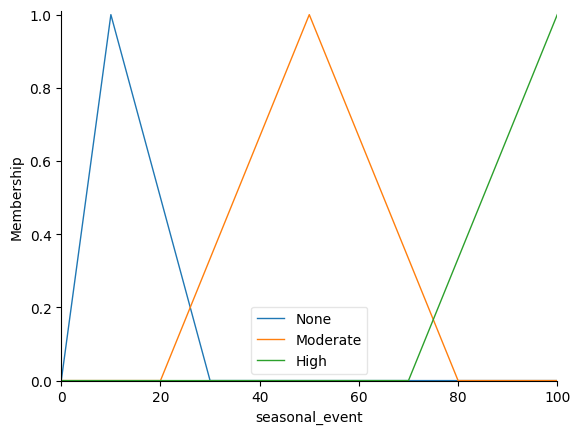

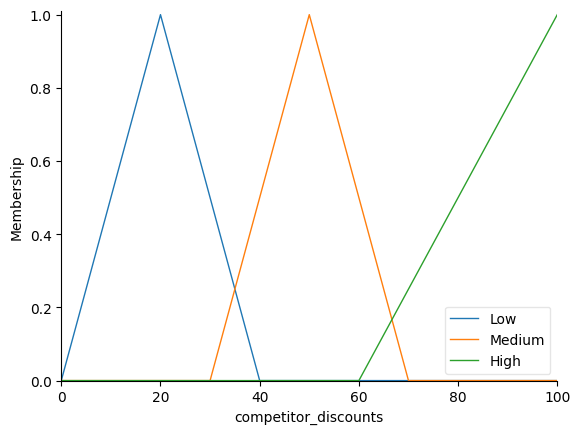

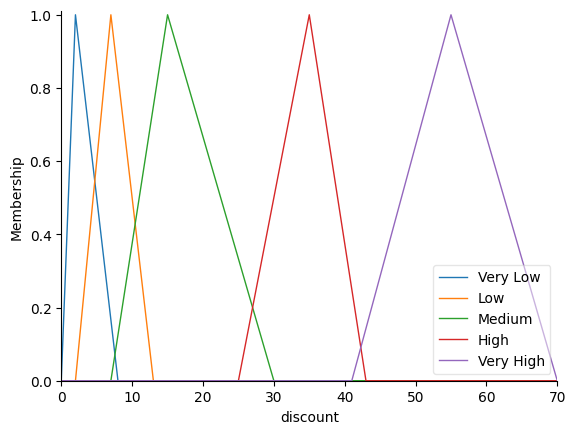

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

store_rating = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'store_rating')
sales_volume = ctrl.Antecedent(np.arange(0, 91, 1), 'sales_volume')
profit_margin = ctrl.Antecedent(np.arange(0, 91, 1), 'profit_margin')
seasonal_event = ctrl.Antecedent(np.arange(0, 101, 1), 'seasonal_event')
competitor_discounts = ctrl.Antecedent(np.arange(0, 101, 1), 'competitor_discounts')

discount = ctrl.Consequent(np.arange(0, 71, 1), 'discount')

store_rating['Low'] = fuzz.trimf(store_rating.universe, [0, 4, 4])
store_rating['Medium'] = fuzz.trimf(store_rating.universe, [3.5, 4.5, 4.5])
store_rating['High'] = fuzz.trimf(store_rating.universe, [4.4, 5, 5])

sales_volume['Low'] = fuzz.trimf(sales_volume.universe, [0, 0, 40])
sales_volume['Medium'] = fuzz.trimf(sales_volume.universe, [20, 45, 70])
sales_volume['High'] = fuzz.trimf(sales_volume.universe, [50, 75, 90])

profit_margin['Low'] = fuzz.trimf(profit_margin.universe, [0, 0, 40])
profit_margin['Medium'] = fuzz.trimf(profit_margin.universe, [20, 45, 70])
profit_margin['High'] = fuzz.trimf(profit_margin.universe, [50, 75, 90])

seasonal_event['None'] = fuzz.trimf(seasonal_event.universe, [0, 10, 30])
seasonal_event['Moderate'] = fuzz.trimf(seasonal_event.universe, [20, 50, 80])
seasonal_event['High'] = fuzz.trimf(seasonal_event.universe, [70, 100, 100])

competitor_discounts['Low'] = fuzz.trimf(competitor_discounts.universe, [0, 20, 40])
competitor_discounts['Medium'] = fuzz.trimf(competitor_discounts.universe, [30, 50, 70])
competitor_discounts['High'] = fuzz.trimf(competitor_discounts.universe, [60, 100, 100])

discount['Very Low'] = fuzz.trimf(discount.universe, [0, 2, 8])
discount['Low'] = fuzz.trimf(discount.universe, [2, 7, 13])
discount['Medium'] = fuzz.trimf(discount.universe, [7, 15, 30])
discount['High'] = fuzz.trimf(discount.universe, [25, 35, 43])
discount['Very High'] = fuzz.trimf(discount.universe, [41, 55, 70])

store_rating.view()
sales_volume.view()
profit_margin.view()
seasonal_event.view()
competitor_discounts.view()
discount.view()

In [ ]:
rule1 = ctrl.Rule(store_rating['High'] & sales_volume['High'] & profit_margin['High'], discount['Very Low'])
rule2 = ctrl.Rule(store_rating['Low'] & sales_volume['Low'] & profit_margin['High'], discount['High'])
rule3 = ctrl.Rule(seasonal_event['High'] & competitor_discounts['High'], discount['High'])
rule4 = ctrl.Rule(store_rating['Medium'] & sales_volume['Medium'] & profit_margin['Medium'], discount['Medium'])
rule5 = ctrl.Rule(competitor_discounts['Low'] & profit_margin['Low'] & sales_volume['High'], discount['Very Low'])
rule6 = ctrl.Rule(store_rating['Low'] & seasonal_event['None'], discount['Medium'])
rule7 = ctrl.Rule(sales_volume['Low'] & profit_margin['Low'], discount['Very High'])

Discount Percentage: 34.33333333333332


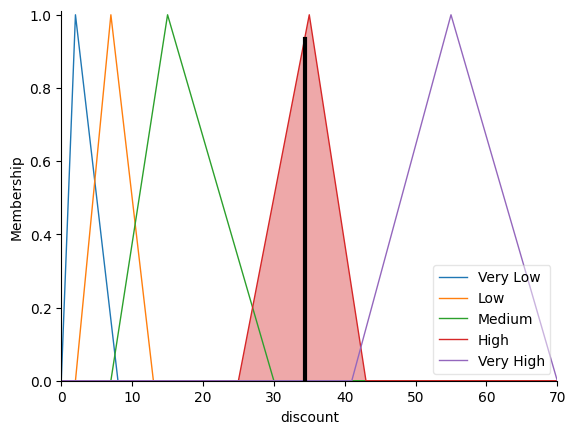

In [ ]:
bai2_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, ruleX])
control = ctrl.ControlSystemSimulation(bai2_system)

control.input['store_rating'] = 4.3
control.input['sales_volume'] = 45
control.input['profit_margin'] = 10
control.input['seasonal_event'] = 100
control.input['competitor_discounts'] = 100

control.compute()

print("Discount Percentage:", control.output['discount'])

discount.view(sim=control)